In [11]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [12]:
print(train_input.shape, train_target.shape)   #(60000, 28, 28) (60000,)
print(test_input.shape, test_target.shape)     #(10000, 28, 28) (10000,)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


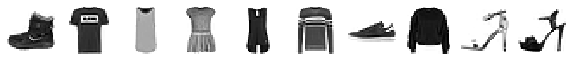

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [17]:
#그려보기
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')

plt.show()

print([train_target[i] for i in range(10)])  #[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [19]:
#0 ~ 255픽셀값을 지니므로 이것을 정규화를 통해 0 ~ 1로 바꿔야한다.
train_scaled = train_input / 255.0

#2차원 배열을 계산을 위해 1차원으로 펼쳐줘야 한다.
train_scaled = train_scaled.reshape(-1, 28*28)
print("train_scaled.shape 확인 : ", train_scaled.shape) #train_scaled.shape : (60000, 784) => 784픽셀로 이뤄진 60000개 샘플

#sgdclassifier, 교차검증 적용
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))   #0.8192833333333333

train_scaled.shape 확인 :  (60000, 784)
0.8192833333333333


In [24]:
#인공신경망으로 모델 만들기
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print("훈련 스케일, 타겟 모양 확인 : ", train_scaled.shape, train_target.shape)
print("검증 모양 확인 : ", val_scaled.shape, val_target.shape)

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))
model = keras.Sequential(dense)

#인공신경망으로 모델 분류하기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

print("훈련 타켓 출력 : ", train_target[:10])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)              #[0.4932505786418915, 0.8405207395553589]


훈련 스케일, 타겟 모양 확인 :  (19660, 784) (19660,)
검증 모양 확인 :  (4916, 784) (4916,)
훈련 타켓 출력 :  [3 2 2 7 0 5 7 8 8 2]
Epoch 1/5
615/615 [==============================] - 0s 369us/step - loss: 0.7218 - accuracy: 0.7580
Epoch 2/5
615/615 [==============================] - 0s 377us/step - loss: 0.5289 - accuracy: 0.8210
Epoch 3/5
615/615 [==============================] - 0s 376us/step - loss: 0.4901 - accuracy: 0.8322
Epoch 4/5
615/615 [==============================] - 0s 369us/step - loss: 0.4706 - accuracy: 0.8405
Epoch 5/5
154/154 [==============================] - 0s 292us/step - loss: 0.4933 - accuracy: 0.8405


[0.4932505786418915, 0.8405207395553589]